In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import cluster
from scipy.cluster.vq import kmeans
from scipy.stats import chi2
from sklearn.cluster import KMeans

In [2]:
taxi_df = pd.read_csv(r'C:\Users\sh_ART\Data\taxi.csv', index_col = 0)

In [3]:
taxi_df=taxi_df[:300]

In [4]:
taxi_df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
295,2014-07-07 03:30:00,1877
296,2014-07-07 04:00:00,2257
297,2014-07-07 04:30:00,2280
298,2014-07-07 05:00:00,2575


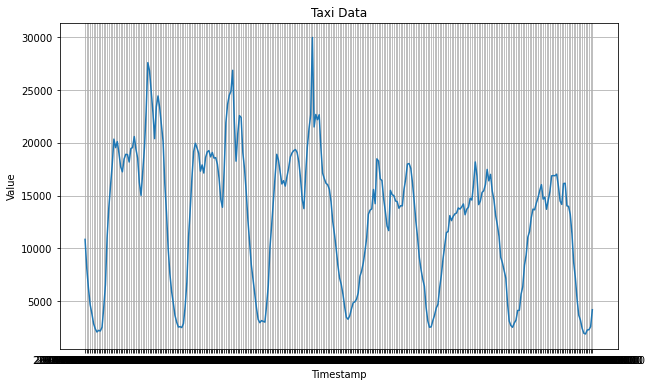

In [5]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(taxi_df['timestamp'], taxi_df['value'])
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Taxi Data')
plt.grid(True)
plt.show()

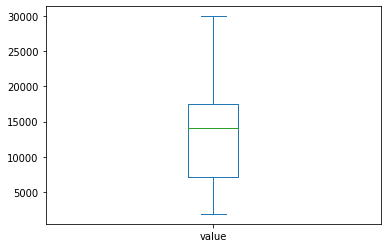

In [6]:
taxi_df['value'].plot(kind='box')
plt.show()

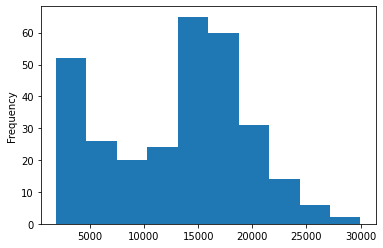

In [7]:
taxi_df['value'].plot(kind='hist')
plt.show()

In [8]:
print('Min value ' + str(taxi_df['value'].min()))
print('Maxi value ' + str(taxi_df['value'].max()))

Min value 1877
Maxi value 29985


In [9]:
taxi_df.describe()

,value
count,300.000000
mean,12978.166667
std,6345.382308
min,1877.000000
25%,7195.000000
50%,14149.500000
75%,17532.500000
max,29985.000000


In [10]:
data=taxi_df['value']

# Кластерный подход для обнаружения аномалий

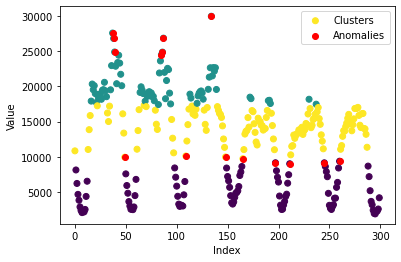

In [11]:
# Convert the data to a NumPy array and reshape
data = np.array(data).reshape(-1, 1)

# Clustering the data using K-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Getting the cluster labels for each data point
labels = kmeans.labels_

# Determining the cluster centers
cluster_centers = kmeans.cluster_centers_

# Determining the distances from each point to the cluster centers
distances = [np.linalg.norm(data[i] - cluster_centers[labels[i]]) for i in range(len(data))]

# Setting a threshold value to determine anomalies
threshold = np.percentile(distances, 95)  # For example, 95th percentile

# Identifying the outlier data points
anomalies = [data[i] for i in range(len(data)) if distances[i] > threshold]

# Plotting the data points
plt.scatter(range(len(data)), data, c=labels, cmap='viridis', label='Clusters')

# Highlighting the anomalies
plt.scatter([i for i in range(len(data)) if distances[i] > threshold], anomalies, color='r', label='Anomalies')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [12]:
data=taxi_df['value']

### Поиск точечных аномалий методом максимального правдоподобия

Метод это статистический подход, который используется для обнаружения редких или аномальных наблюдений в данных. Он основан на оценке вероятности или правдоподобия наблюдений и сравнении их с ожидаемым распределением данных.

Аномальные точки: [2064, 2221, 2158, 27598, 26827, 24904, 24439, 24512, 24887, 26872, 29985, 1944, 1877, 2257, 2280]


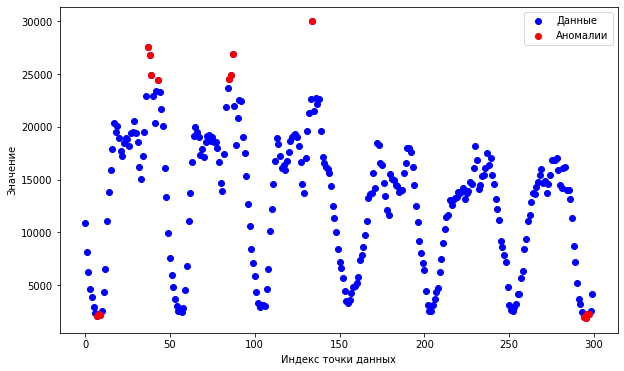

In [13]:
# Оценка параметров нормального распределения
mu, std = norm.fit(data)

# Вычисление правдоподобия для каждой точки данных
likelihoods = norm.pdf(data, loc=mu, scale=std)

# Установка порогового значения для определения аномалий
threshold = np.percentile(likelihoods, 5)  # Например, 5-й перцентиль

# Идентификация точечных аномалий
anomalies = [data[i] for i, likelihood in enumerate(likelihoods) if likelihood < threshold]

# Вывод результатов
print("Аномальные точки:", anomalies)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color='b', label='Данные')
plt.scatter([i for i, likelihood in enumerate(likelihoods) if likelihood < threshold], anomalies, color='r', label='Аномалии')
plt.xlabel('Индекс точки данных')
plt.ylabel('Значение')
plt.legend()
plt.show()

### Поиск точечных аномалий методом оценки χ2

Аномальные точки: [2064, 2221, 2158, 27598, 26827, 24904, 24439, 24512, 24887, 26872, 29985, 1944, 1877, 2257, 2280]


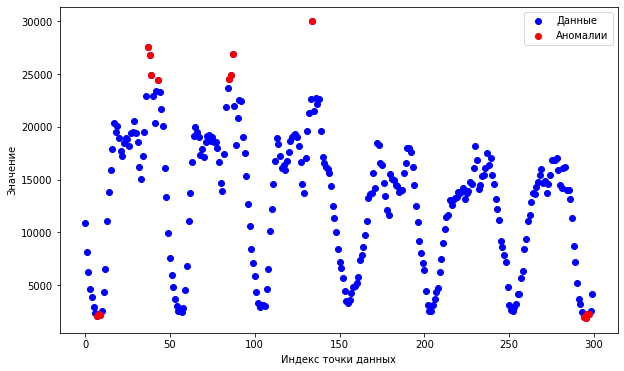

In [14]:
# Оценка параметров модели распределения
expected_model = np.mean(data)  # Пример: ожидаемое значение - среднее арифметическое

# Расчет ожидаемого количества наблюдений в каждом бине
expected_counts = np.full(len(data), expected_model)

# Расчет статистики χ² для каждого бина
chi2_values = ((np.array(data) - expected_counts) ** 2) / expected_counts

# Установка порогового значения для определения аномалий
threshold = np.percentile(chi2_values, 95)  # Например, 95-й перцентиль

# Идентификация точечных аномалий
anomalies = [data[i] for i, chi2_val in enumerate(chi2_values) if chi2_val > threshold]

# Вывод результатов
print("Аномальные точки:", anomalies)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color='b', label='Данные')
plt.scatter([i for i, chi2_val in enumerate(chi2_values) if chi2_val > threshold], anomalies, color='r', label='Аномалии')
plt.xlabel('Индекс точки данных')
plt.ylabel('Значение')
plt.legend()
plt.show()